# Project 6: Visualizing Monetary Policy

In [1]:
# !pip install pandas-datareader

In [2]:
import os 
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt



start = datetime.datetime(1948, 1, 1)
end = datetime.datetime.today()
df = web.DataReader("GDPC1", "fred", start, end).resample("Q").mean()
df

,GDPC1
DATE,
1948-03-31,2087.442
1948-06-30,2121.899
1948-09-30,2134.056
1948-12-31,2136.440
1949-03-31,2107.001
...,...
2021-12-31,20006.181
2022-03-31,19924.088
2022-06-30,19895.271


<AxesSubplot:xlabel='DATE'>

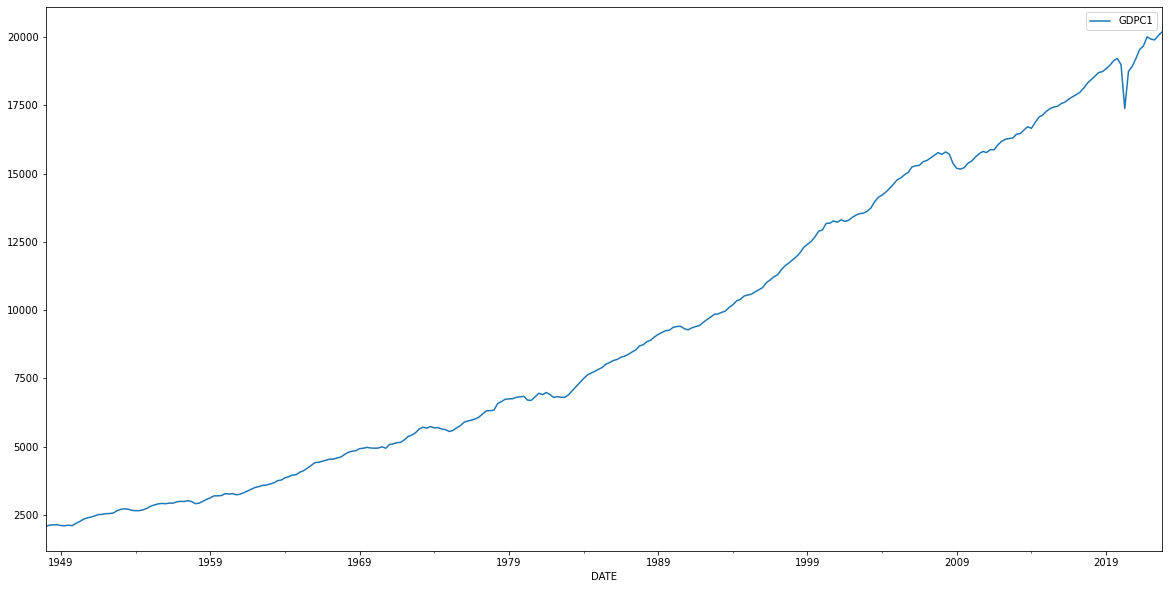

In [3]:
df.plot.line(figsize = (20,10))

In [4]:
def gather_data(data_codes,
               start,
               end = datetime.datetime.today(),
               freq = "M"):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            # .first() or .last() or .median . . .
            df = web.DataReader(code, "fred", start, end).resample(freq).mean() 
            df.rename(columns = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
    return df

In [5]:
data_codes  = {"Base: Total": "BOGMBASEW",
               "Base: Currency in Circulation": "WCURCIR"}
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq = "W")


In [6]:
data["Base: Currency in Circulation"] = data["Base: Currency in Circulation"].mul(1000)

In [7]:
data.iloc[-10:]

,Base: Total,Base: Currency in Circulation
DATE,,
2020-07-12,4772522.0,1974690.0
2020-07-19,4772522.0,1978510.0
2020-07-26,4609143.0,1982873.0
2020-08-02,4609143.0,1988190.0
2020-08-09,4750981.0,1996626.0
2020-08-16,4750981.0,2003019.0
2020-08-23,4830999.0,2007458.0
2020-08-30,4830999.0,2010991.0
2020-09-06,4876690.0,2016895.0


<AxesSubplot:xlabel='DATE'>

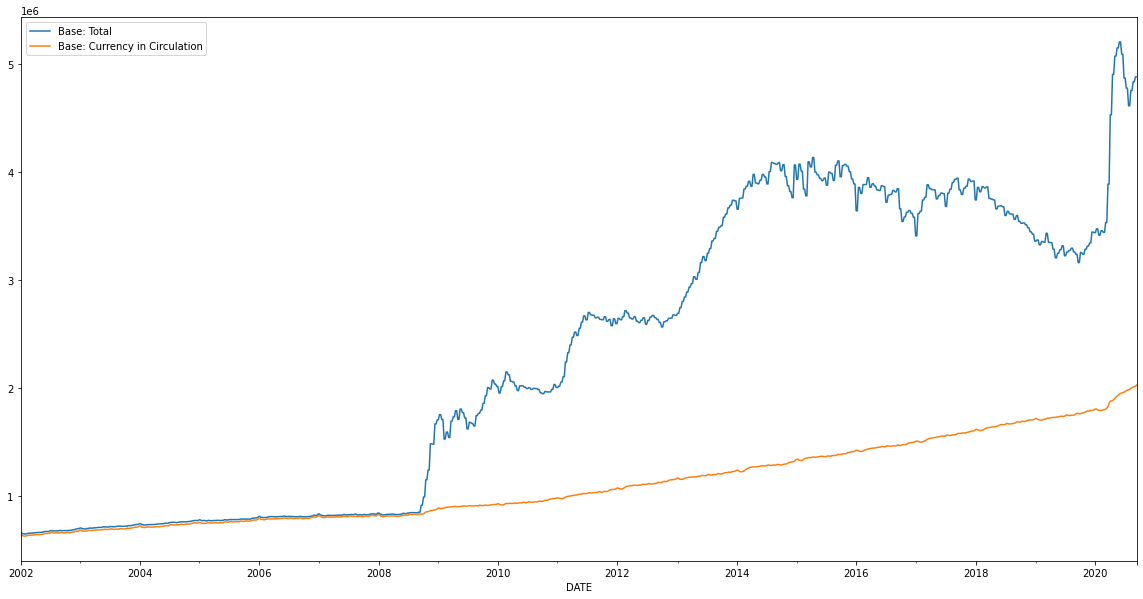

In [8]:
fig, ax = plt.subplots(figsize = (20,10))
data.plot.line(ax = ax)

Text(0.5, 1.0, 'Currency in Circulation')

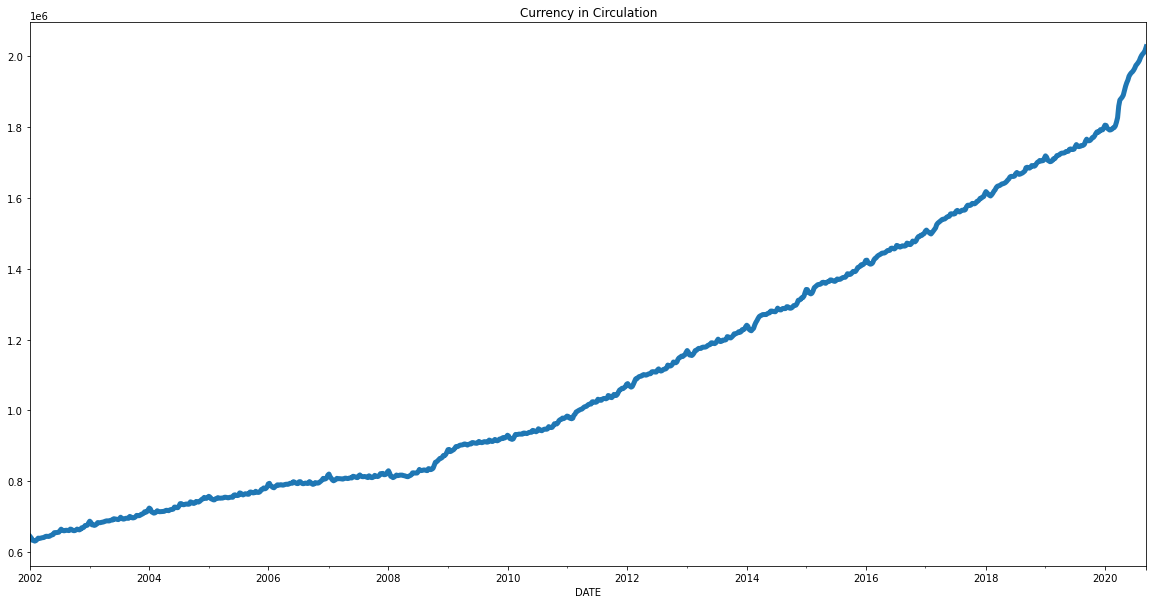

In [9]:
fig, ax = plt.subplots(figsize = (20,10))
data["Base: Currency in Circulation"].plot.line(linewidth = 5, ax = ax)
ax.set_title("Currency in Circulation")

In [10]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               "Interest on Reserve Balances":"IORB",

               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }
data = gather_data(data_codes = data_codes,
                  start = start, 
                  end = end,
                  freq = "M")


In [11]:
data.to_csv("MonetaryData.csv")

## Merge two data sets, interest on reserves at Fed, with one overlapping date

In [12]:
plot_data = data[["Interest on Reserve Balances", "Interest on Excess Reserves"]]
match = plot_data[plot_data["Interest on Reserve Balances"] == plot_data["Interest on Excess Reserves"]]
match

,Interest on Reserve Balances,Interest on Excess Reserves
DATE,,
2021-07-31,0.15,0.15


In [13]:
match_date = match.index
match_val = match.sum(axis = 1) / 2
match_date, match_val

(DatetimeIndex(['2021-07-31'], dtype='datetime64[ns]', name='DATE', freq='M'),
 DATE
 2021-07-31    0.15
 Freq: M, dtype: float64)

In [14]:
# sum the interest rate data sets
plot_data = plot_data.fillna(0)
plot_data = plot_data.sum(axis = 1)


<AxesSubplot:xlabel='DATE'>

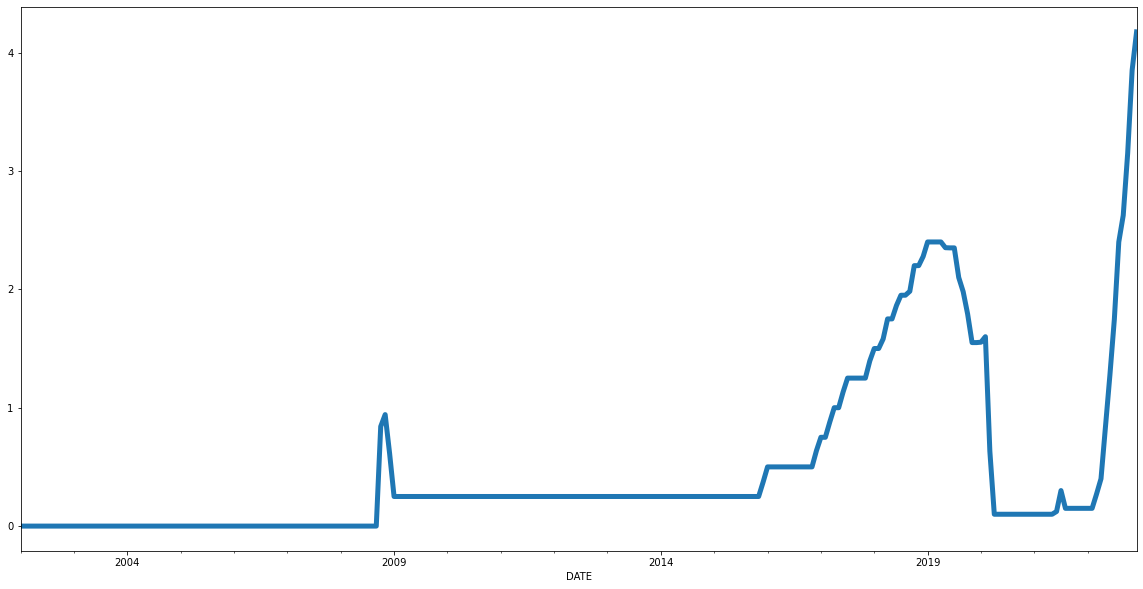

In [15]:
fig, ax = plt.subplots(figsize = (20,10))

plot_data.plot.line(linewidth = 5, ax = ax)
# data["Interest on Reserves"] = data["Interest on Excess Reserves"].fillna(0).add(
#     data["Interest on Reserve Balances"])

<AxesSubplot:xlabel='DATE'>

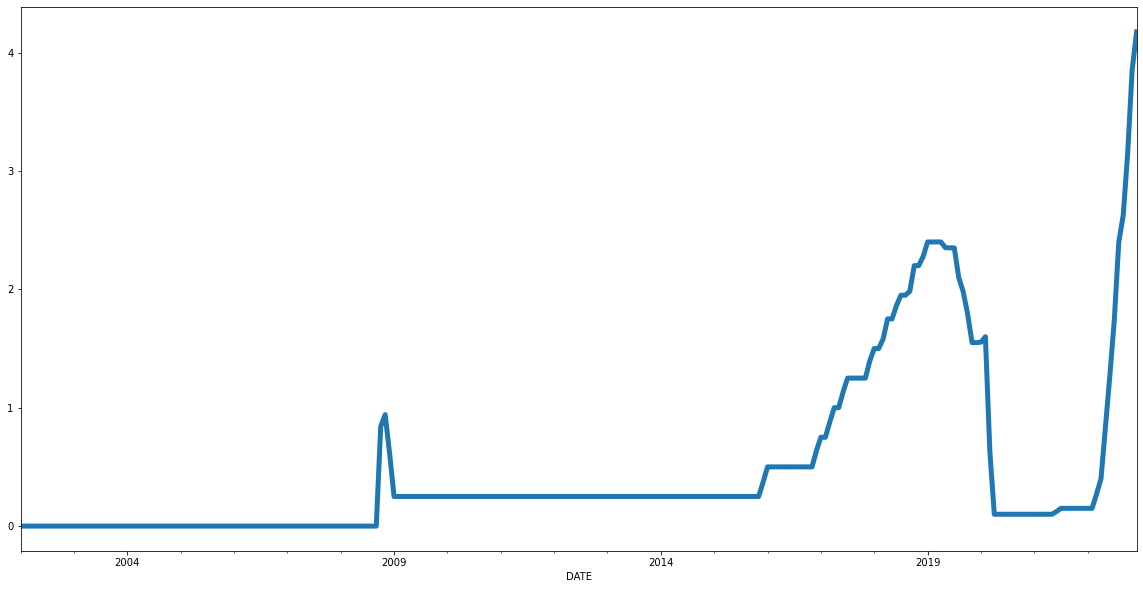

In [16]:
plot_data.loc[match_date] = match_val
fig, ax = plt.subplots(figsize = (20,10))

plot_data.plot.line(linewidth = 5, ax = ax)

In [17]:
plot_data

DATE
2002-01-31    0.000000
2002-02-28    0.000000
2002-03-31    0.000000
2002-04-30    0.000000
2002-05-31    0.000000
                ...   
2022-08-31    2.400000
2022-09-30    2.625000
2022-10-31    3.150000
2022-11-30    3.850000
2022-12-31    4.174194
Freq: M, Length: 252, dtype: float64

<AxesSubplot:xlabel='DATE'>

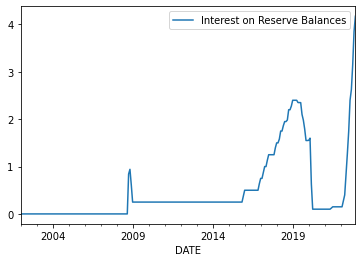

In [18]:
data["Interest on Reserve Balances"] = plot_data
data[["Interest on Reserve Balances"]].plot()

## Build Function to Plot Lines of data in dataframe

C:\Users\JLCat\AppData\Local\Temp\ipykernel_19416\2692019775.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])
C:\Users\JLCat\AppData\Local\Temp\ipykernel_19416\2692019775.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + "%" for y in y_vals])


[Text(0, -1.0, '-1.0%'),
 Text(0, 0.0, '0.0%'),
 Text(0, 1.0, '1.0%'),
 Text(0, 2.0, '2.0%'),
 Text(0, 3.0, '3.0%'),
 Text(0, 4.0, '4.0%'),
 Text(0, 5.0, '5.0%'),
 Text(0, 6.0, '6.0%')]

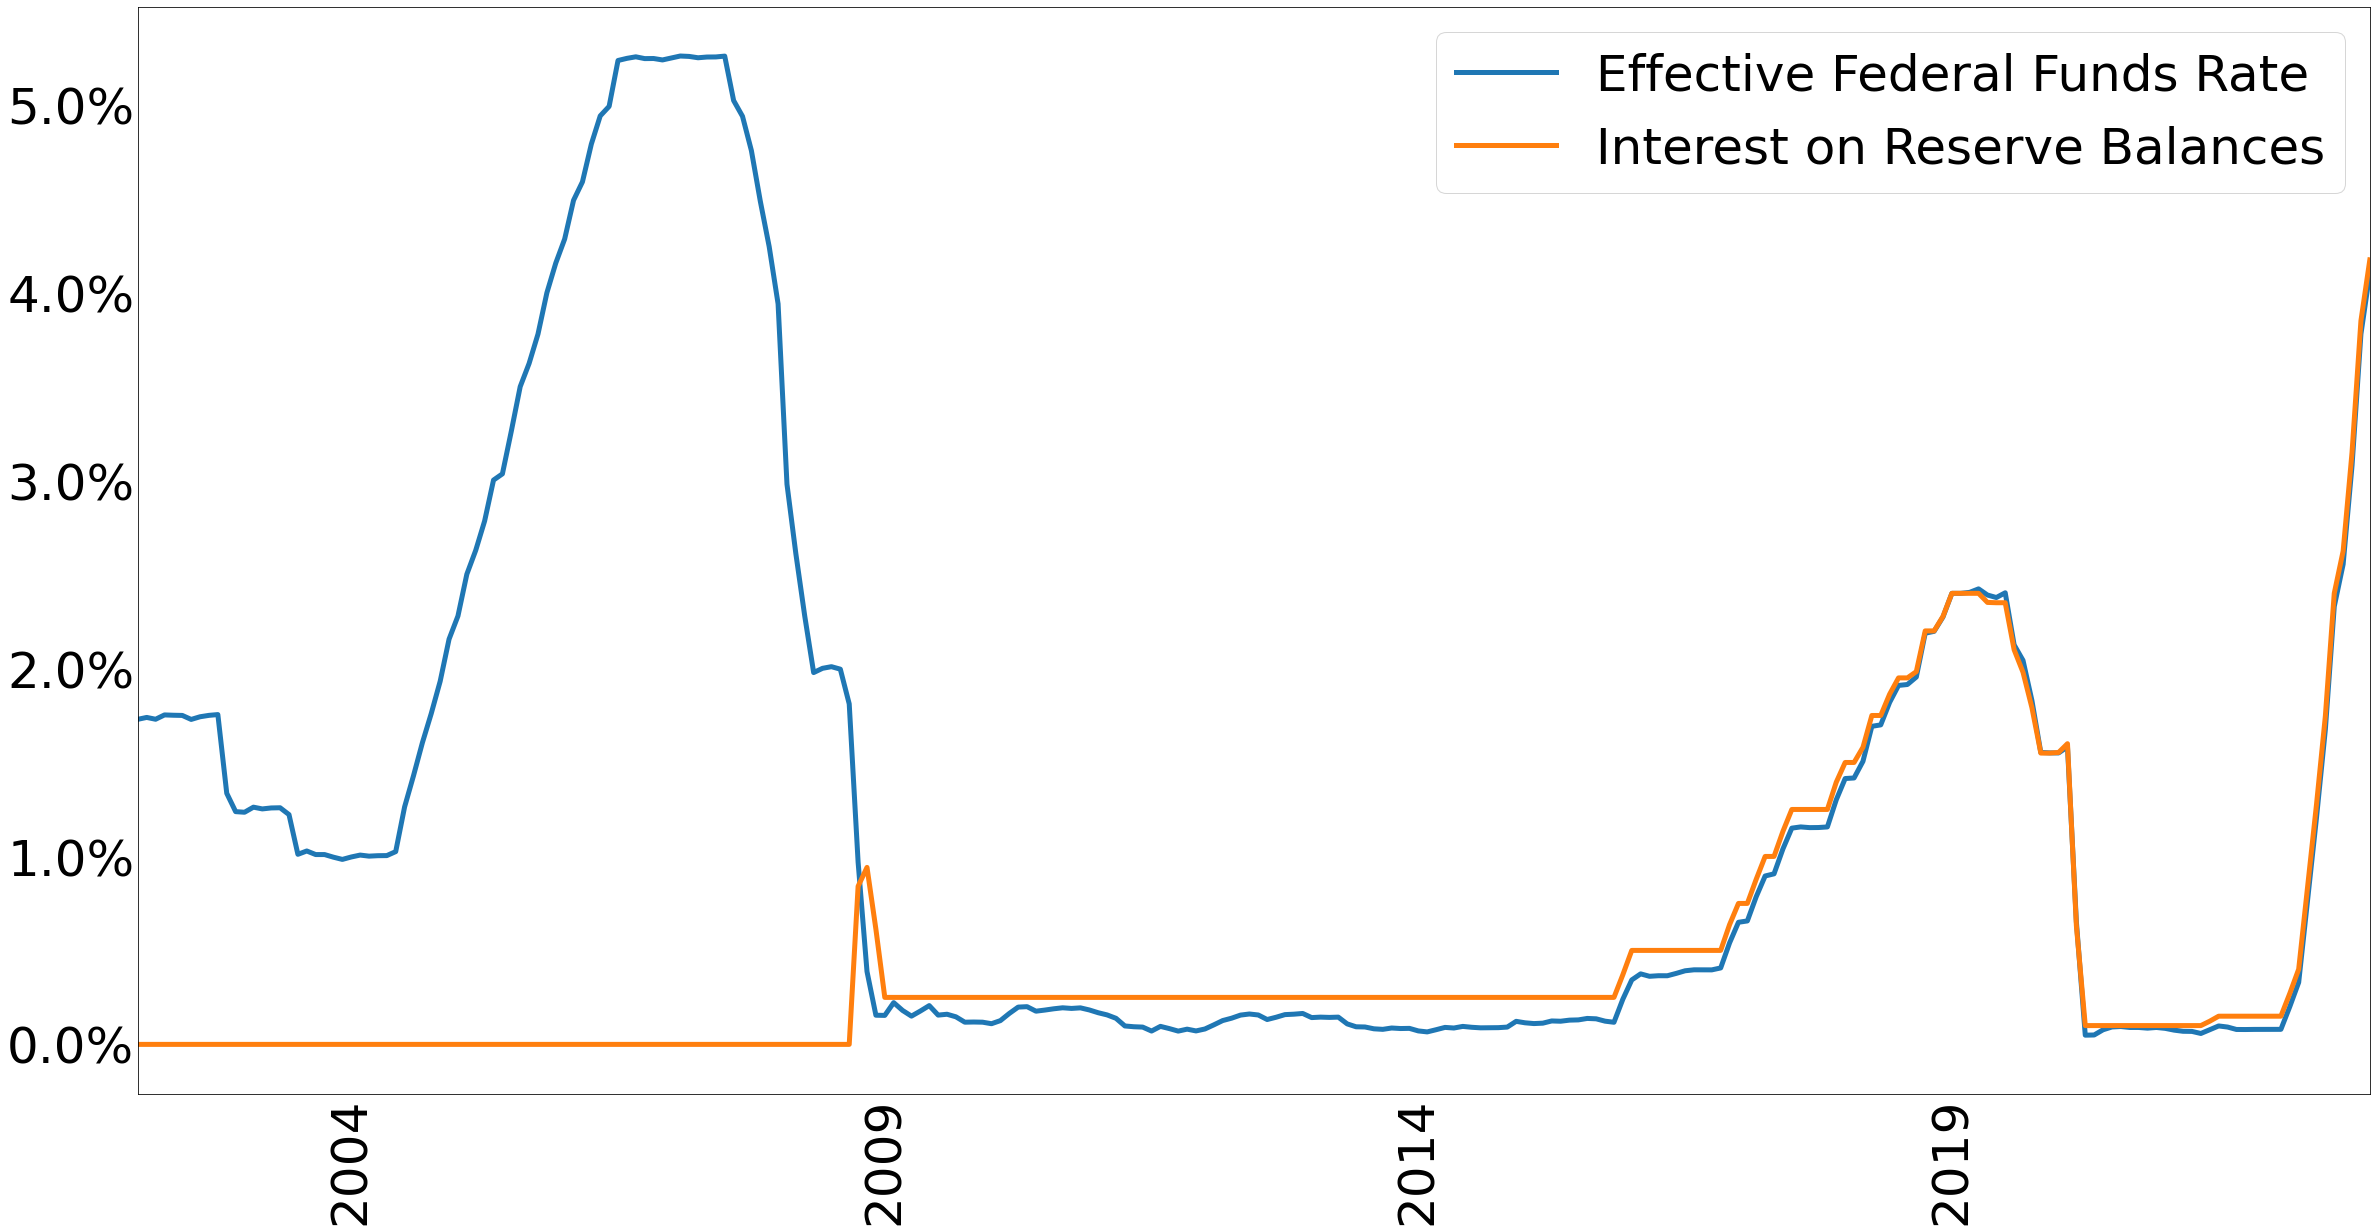

In [19]:
import os
def plot_lines(df,
              linewidth = 5,
              figsize = (40, 20),
              secondary_y = None,
              legend = True,
              pp = None,
              save_fig = False,
              global_fontsize = 50):
    plt.rcParams.update({"font.size":global_fontsize})
    fig, ax = plt.subplots(figsize = figsize)
    df.dropna(axis = 0, how = "all").plot.line(
        linewidth = linewidth,
        ax = ax,
        secondary_y = secondary_y,
        legend = legend)
    # remove label "DATE"
    ax.set_xlabel("")
    ax.tick_params(axis = "x", rotation = 90)
    ax.tick_params(length=0, which='both')
    # round axis tick values
    # 1. access values
    y_vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in y_vals])
    
    # save figure as file
    remove_chars = "[]:$'\\'"
    filename = str(list(df.keys()))
    # remove characters from filename
    for char in remove_chars:
        filename = filename.replace(char, "")
    if save_fig:
        folder = "Monetary Plots"
        try:
            os.mkdir(folder)
        except:
            pass
        plt.savefig(folder + "/" + filename[:50] + " line.png",
                   bbox_inches = "tight")
    
    return fig, ax

plot_data = data[["Effective Federal Funds Rate",
                  "Interest on Reserve Balances"]]
fig, ax = plot_lines(plot_data, save_fig = True) 
y_vals = ax.get_yticks()
ax.set_yticklabels([str(y) + "%" for y in y_vals])



## Monetary Base

In [22]:
bil_to_mil_list  = ["Balance Sheet: Total Reserves ($ Mil)",
                    "Balance Sheet: Other Deposits ($ Mil)",
                    "Base: Currency in Circulation ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = data[key].mul(10 ** 3)

In [23]:
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)"]
plot_data = data[money_vars]
plot_data









,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Excess Reserves ($ Mil)
DATE,,,
2002-01-31,653800.0,635429.00,1446.20
2002-02-28,654600.0,635884.00,1377.25
2002-03-31,659000.0,639697.50,1370.25
2002-04-30,663400.0,643579.50,1263.50
2002-05-31,668600.0,648293.20,1256.20
...,...,...,...
2022-08-31,5582300.0,2275415.60,NaN
2022-09-30,5410900.0,2279946.25,NaN
2022-10-31,5339700.0,2283799.00,NaN


C:\Users\JLCat\AppData\Local\Temp\ipykernel_19416\2692019775.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


(<Figure size 2880x1440 with 1 Axes>, <AxesSubplot:>)

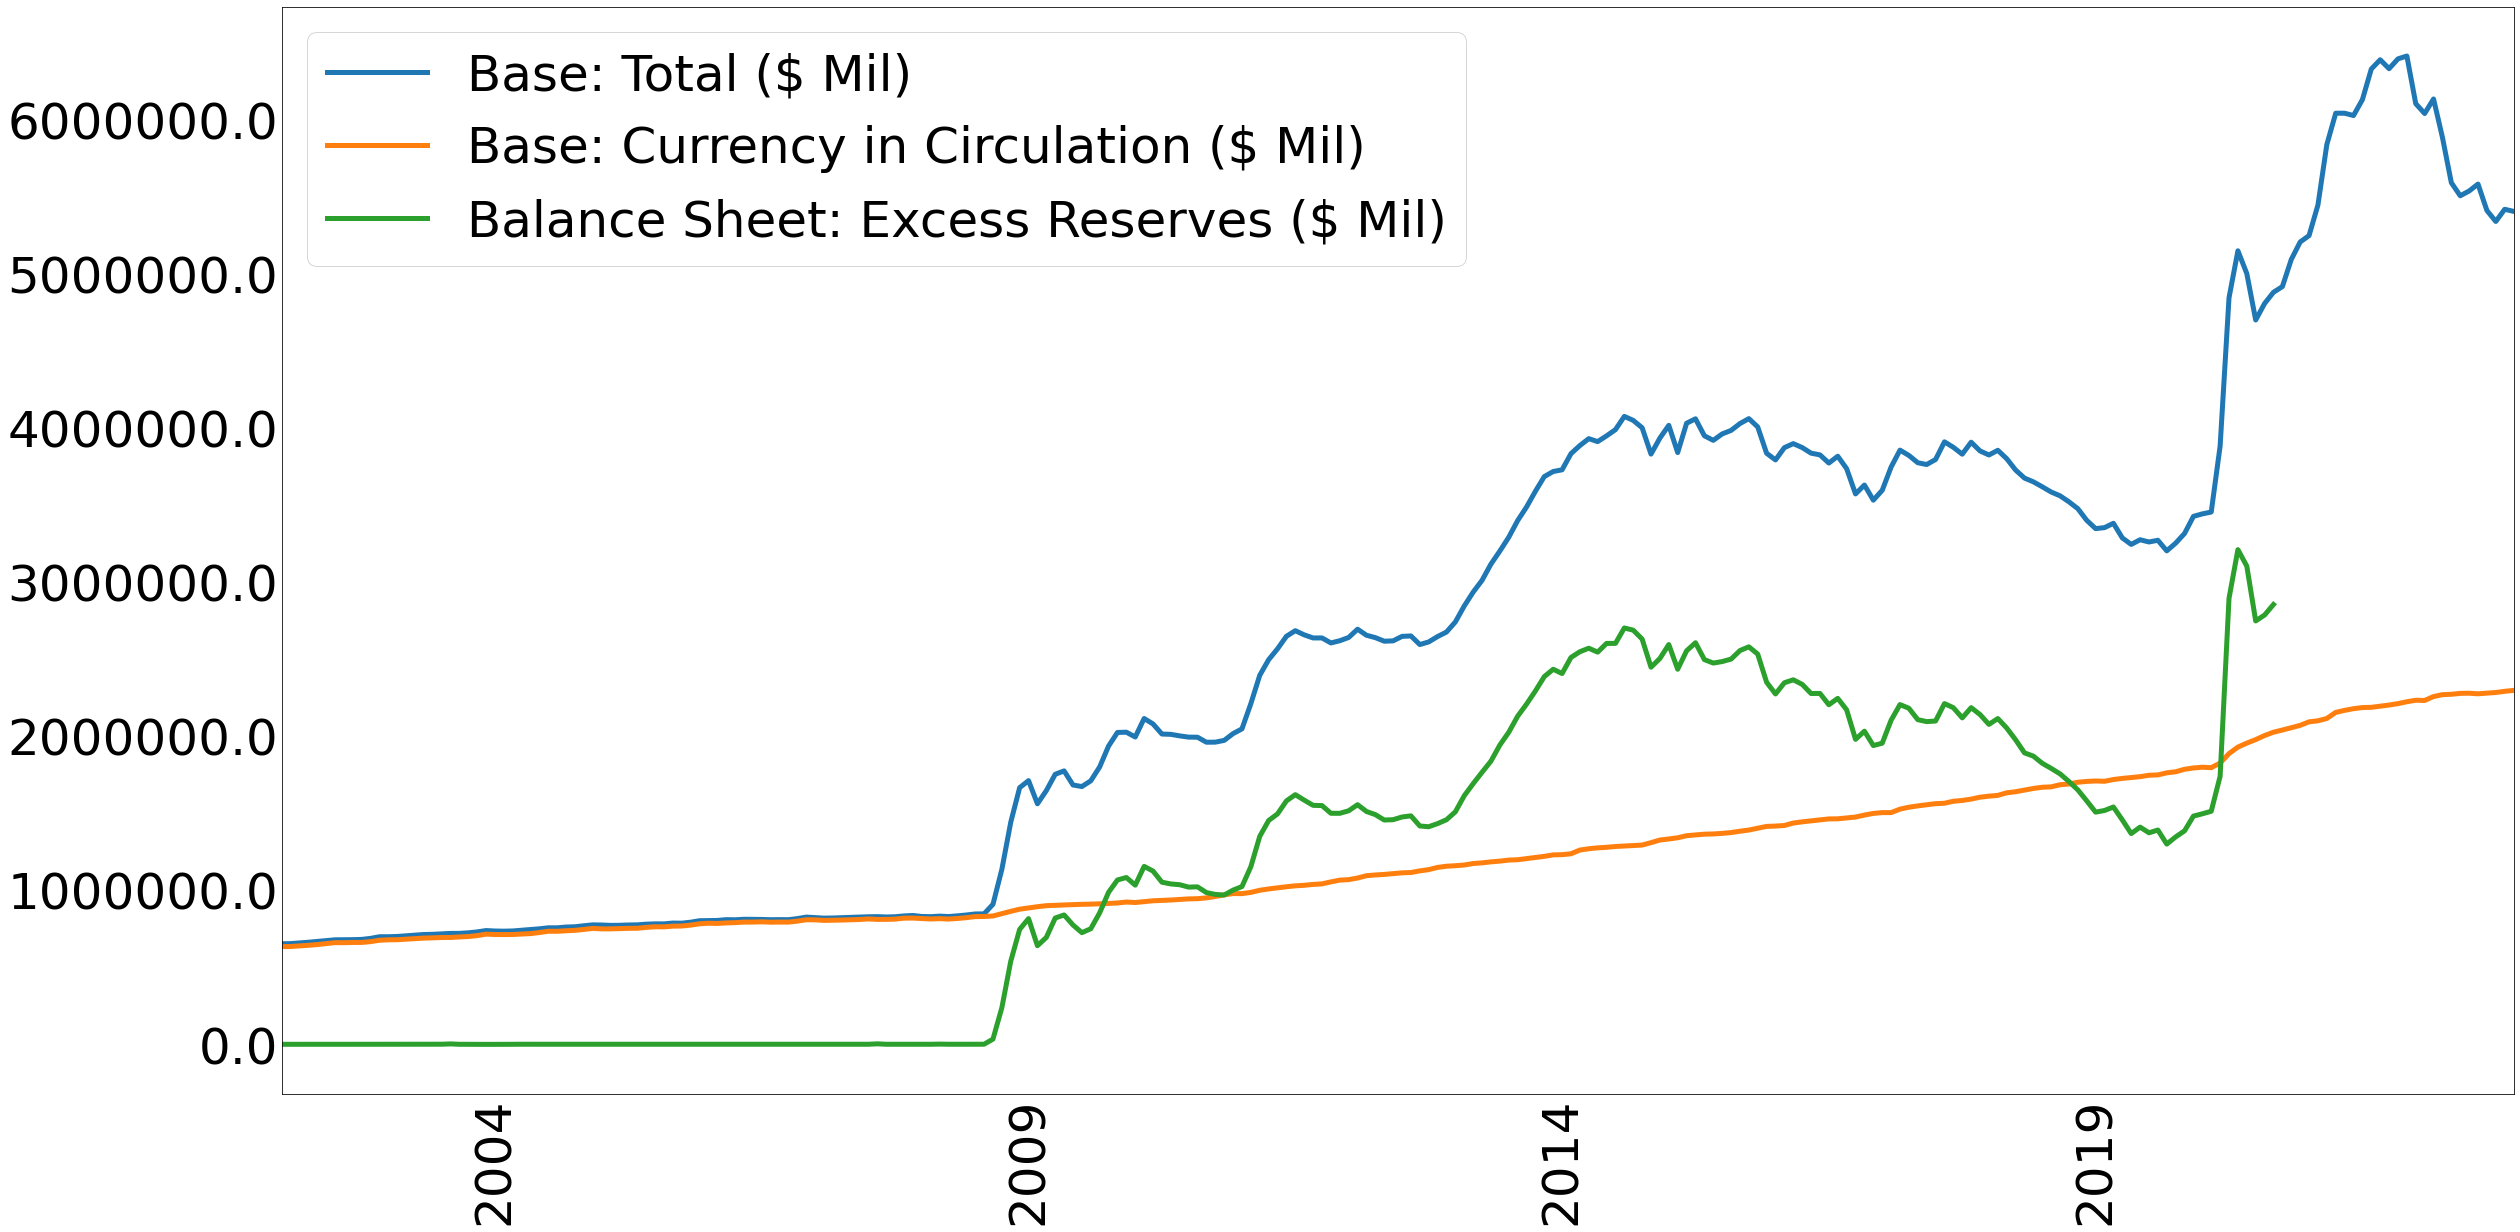

In [24]:
plot_lines(df = plot_data, linewidth = 5, figsize = (40, 20), pp = None)


## Stacked Lines

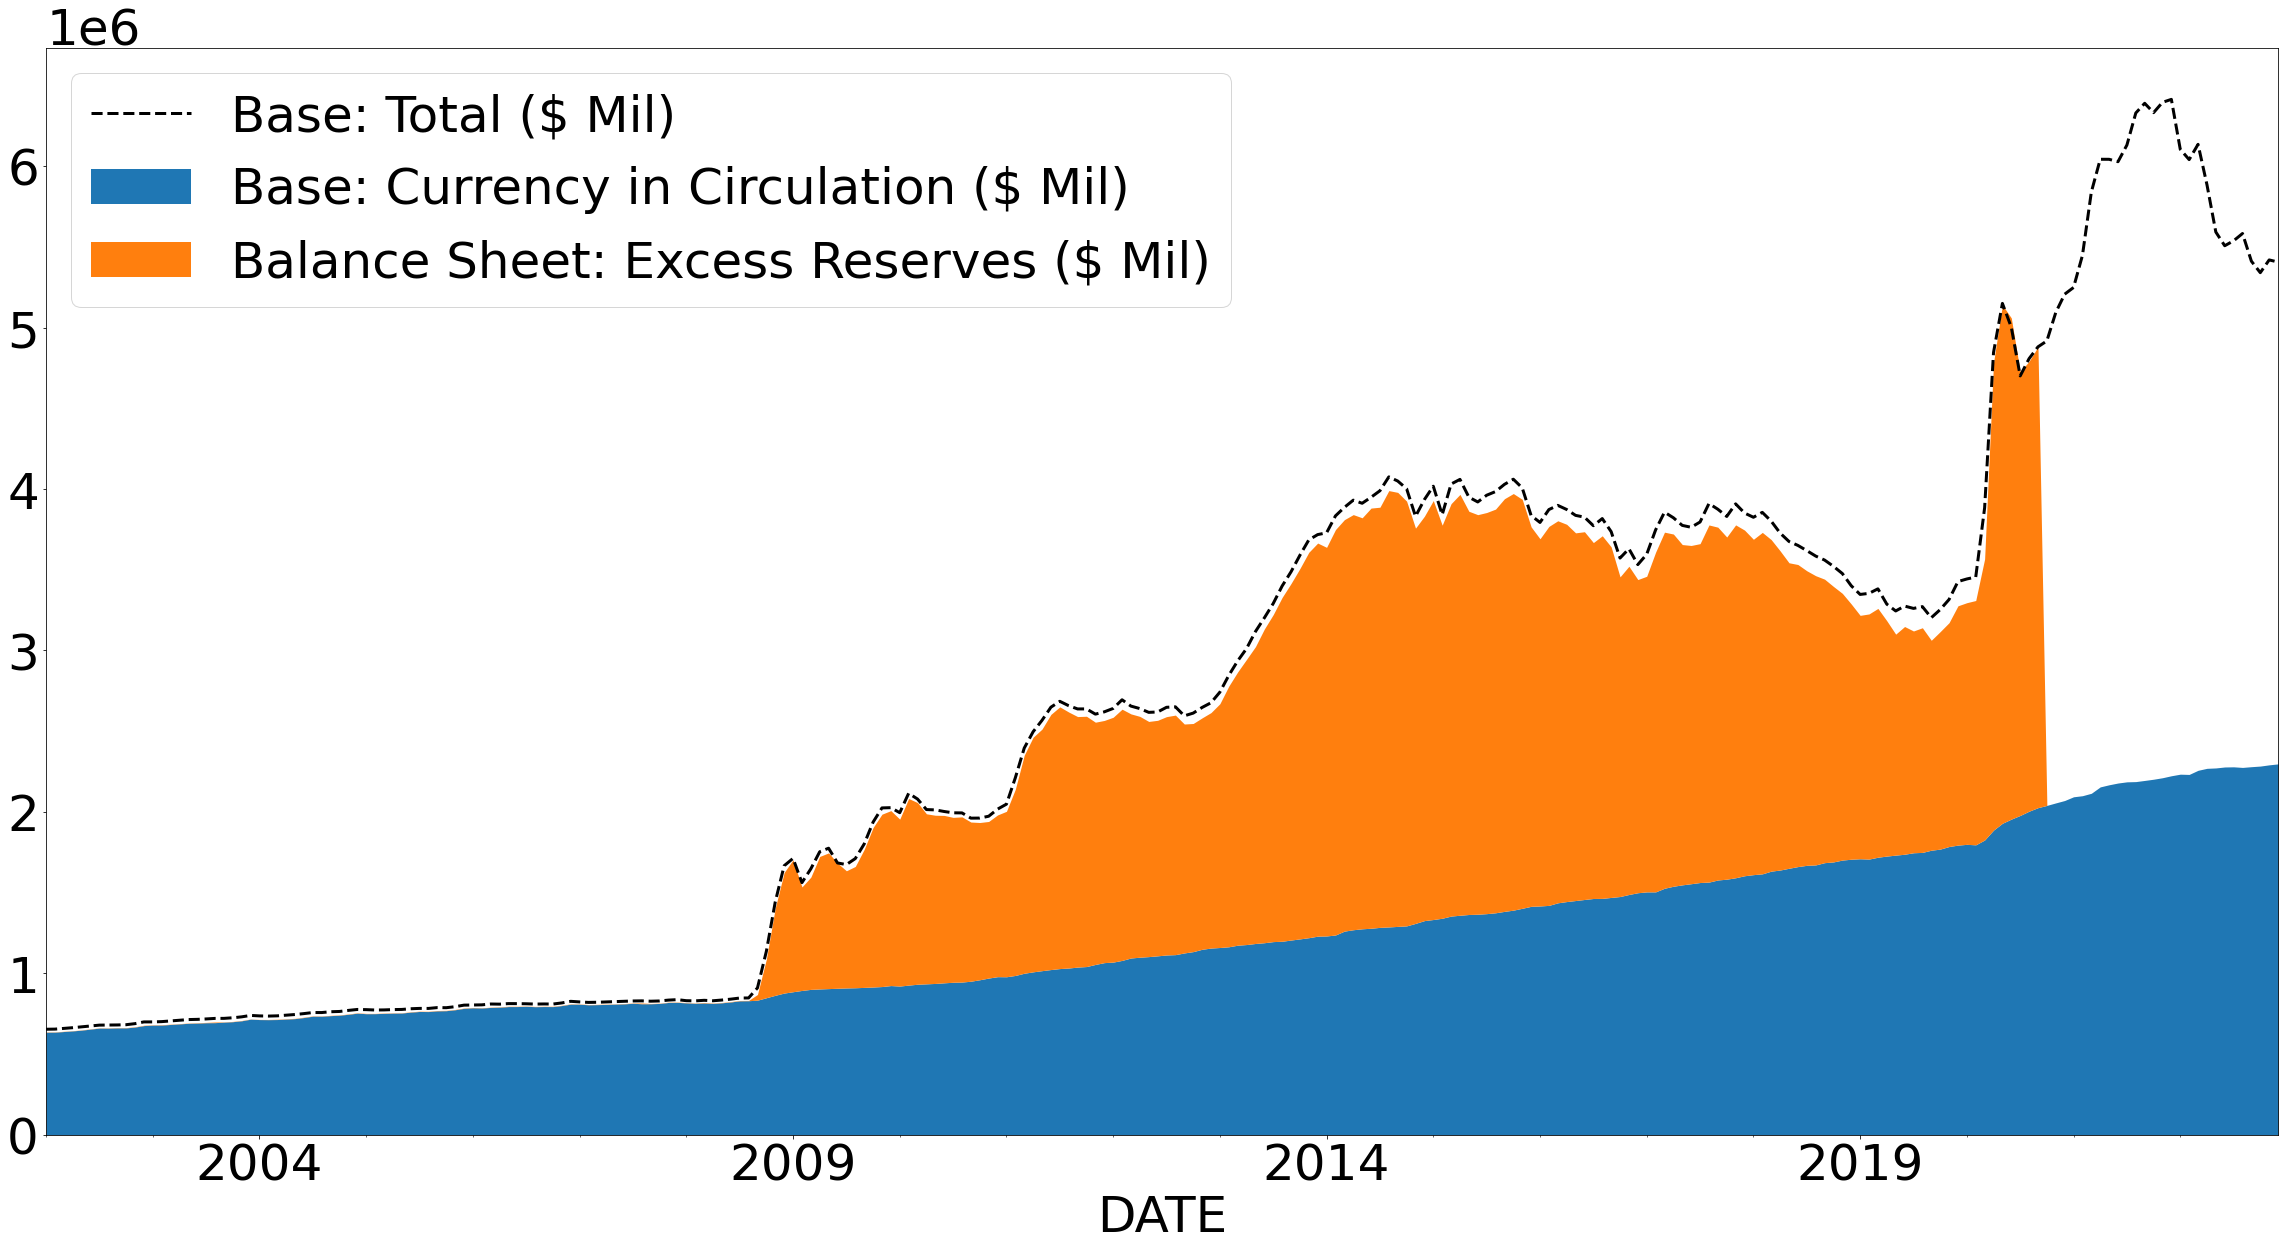

In [46]:
def plot_stacked(df,
                 stack_vars,
                 linewidth = 3,
                 figsize = (40,20),
                 total_var = False,
                 global_fontsize = 50,
                 ncol = 1
                ):
    plt.rcParams.update({"font.size":global_fontsize})
    fig, ax = plt.subplots(figsize = figsize)
    if total_var != False:
        df[total_var].plot.line(
            linewidth = linewidth,
            ax = ax,
            c = "k",
            label = total_var,
            ls = "--")
        
    area_df = df[stack_vars]
    area_df.plot.area(stacked = True,
                  linewidth = 0,
                  ax = ax)
    ax.legend(loc = 2, ncol = ncol)
           #  bbox_to_anchor = (0,1))    

    return fig, ax

stack_vars = money_vars[1:]
total_var = money_vars[0]
fig, ax = plot_stacked(df = data, 
                       stack_vars = stack_vars, 
                       total_var = total_var)

In [28]:
plot_data.dtypes

Base: Total ($ Mil)                       float64
Base: Currency in Circulation ($ Mil)     float64
Balance Sheet: Excess Reserves ($ Mil)    float64
dtype: object